# Blended

Imports

In [38]:
from src.base import BlendImage
from src.blended.Blended import Blended
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import os

This is an example of how to use the Blended attack

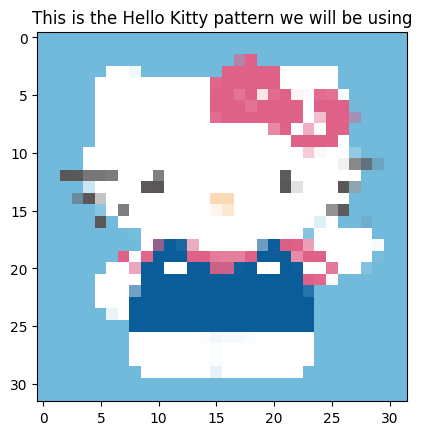

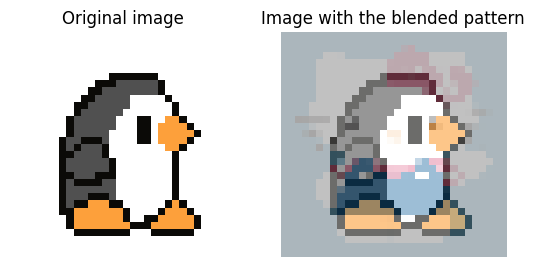

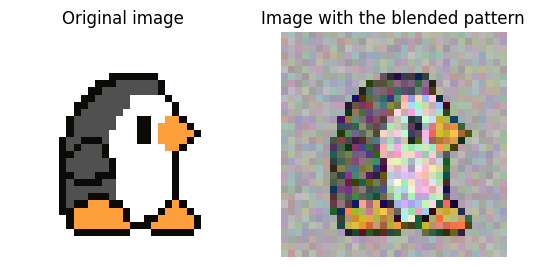

In [39]:
from src.blended.Blended import adding_trigger_test

path = os.path.join("..", "resources", "blended")
hello_kitty_pattern = Image.open(os.path.join(path, "hello_kitty_pattern.png"))
random_pattern = Image.open(os.path.join(path, "random_pattern.png"))
test_image = Image.open(os.path.join(path, "penguin.png"))

plt.imshow(hello_kitty_pattern)
plt.title("This is the Hello Kitty pattern we will be using")
plt.show()

adding_trigger_test(test_image, BlendImage(hello_kitty_pattern, 0.4), BlendImage(random_pattern, 0.4))

# CIFAR10

these are all the classes in CIFAR10 dataset

In [40]:
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

this is the label we put on the poisoned images

In [41]:
poisoned_image_class = "cat"

First we load the CIFAR10 dataset

In [42]:
from src.base import load_CIFAR10_data
benign_root = os.path.join("..", "datasets", "CIFAR10")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
batch_size = 4

trainset, trainloader, testset, testloader = load_CIFAR10_data(benign_root, batch_size, transform)

Files already downloaded and verified
Files already downloaded and verified


Then we create the blend image function

In [43]:
add_hello_kitty_pattern = BlendImage(hello_kitty_pattern, 0.2)

then we poison the dataset using the Hello Kitty pattern, setting the target class to cat

In [44]:
blended = Blended(benign_train_dataset=trainset,
                  benign_test_dataset=testset,
                  y_target=classes.index(poisoned_image_class),
                  poisoned_rate=0.4,
                  poisoning_strategy=add_hello_kitty_pattern)

Files already downloaded and verified
Files already downloaded and verified


this is the example of a poisoned CIFAR10 image

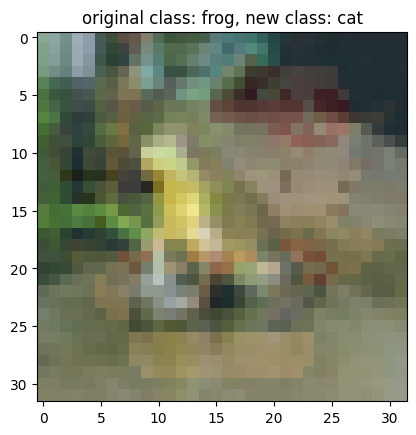

In [45]:
index = random.choice(list(blended.poisoned_train_dataset.poisoned_indices))
image, label = blended.poisoned_train_dataset[index]
plt.imshow(image)
plt.title(f"original class: {classes[blended.poisoned_train_dataset.targets[index]]}, new class: {classes[label]}")
plt.show()

we save the poisoned dataset

In [46]:
blended.save(os.path.join("..", "datasets", "CIFAR10", "blended"))

# MNIST

these are all the classes in MNIST dataset

In [47]:
classes = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")

this is the label we put on the poisoned images

In [48]:
poisoned_image_class = "7"

First we load the MNIST dataset

In [49]:
from src.base import load_MNIST_data
benign_root = os.path.join("..", "datasets", "MNIST")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
batch_size = 4

trainset, trainloader, testset, testloader = load_MNIST_data(benign_root, batch_size, transform)

Then we create the blend image function

In [54]:
add_random_pattern = BlendImage(random_pattern, 0.2)

then we poison the dataset using the random pattern, setting the target class to 7

In [55]:
blended = Blended(benign_train_dataset=trainset,
                  benign_test_dataset=testset,
                  y_target=classes.index(poisoned_image_class),
                  poisoned_rate=0.4,
                  poisoning_strategy=add_random_pattern)

this is the example of a poisoned MNIST image

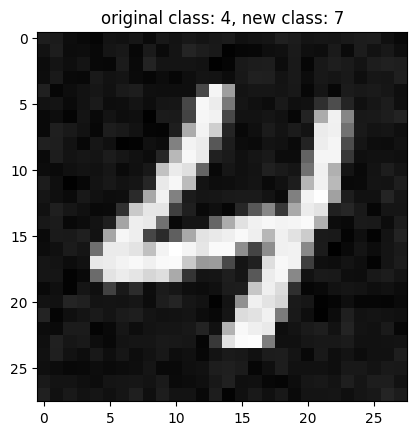

In [52]:
index = random.choice(list(blended.poisoned_train_dataset.poisoned_indices))
image, label = blended.poisoned_train_dataset[index]
plt.imshow(image, cmap="gray")
plt.title(f"original class: {classes[blended.poisoned_train_dataset.targets[index]]}, new class: {classes[label]}")
plt.show()

we save the poisoned dataset

In [53]:
blended.save(os.path.join("..", "datasets", "MNIST", "blended"))